In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("wine.csv")

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [5]:

df[df.select_dtypes(include='float64').columns] = df.select_dtypes(include='float64').astype('int64')


In [6]:
df.dtypes

Type               int64
Alcohol            int64
Malic              int64
Ash                int64
Alcalinity         int64
Magnesium          int64
Phenols            int64
Flavanoids         int64
Nonflavanoids      int64
Proanthocyanins    int64
Color              int64
Hue                int64
Dilution           int64
Proline            int64
dtype: object

In [7]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_data = scaler.fit_transform(df)

In [9]:
from sklearn.cluster import KMeans
wsse = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=10)
    model.fit(df)
    wsse.append(model.inertia_)

c:\Users\Tejaswi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Tejaswi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Tejaswi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Tejaswi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

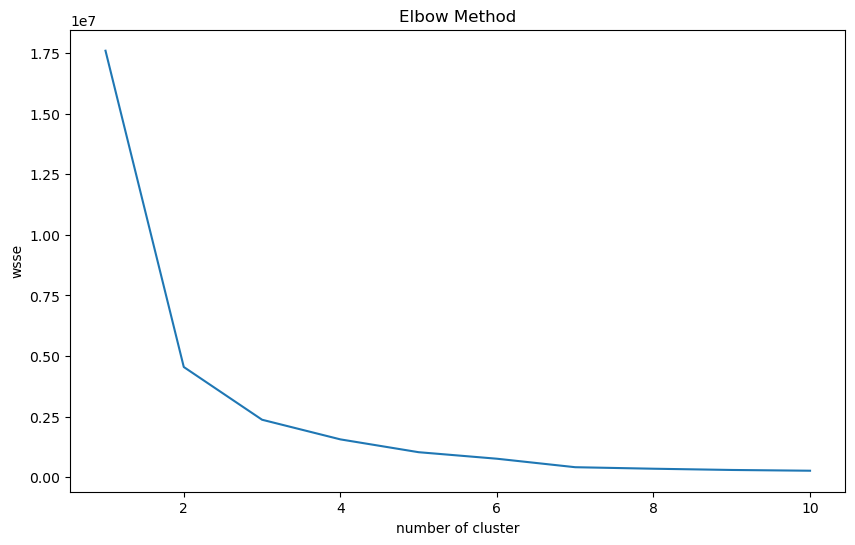

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wsse)
plt.title("Elbow Method")
plt.xlabel("number of cluster")
plt.ylabel("wsse")
plt.show()

In [11]:

Kmeans = KMeans(n_clusters=3, random_state=42)
df["Clusters"] = Kmeans.fit_predict(df)

c:\Users\Tejaswi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_score = silhouette_score(df, Kmeans.labels_)
db_score = davies_bouldin_score(df, df["Clusters"])
print(f"silhouette_score:", sil_score)
print(f"davies_bouldin_score: {db_score:.3f}")


silhouette_score: 0.5595398179735757
davies_bouldin_score: 0.550


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)
pca_comp= pca.fit_transform(df.drop(columns="Clusters"))


In [14]:
plt.figure(figsize=(12,6))
for cluster in range(w):
    mask = df["Clusters"] == cluster
    plt.scatter(pca_comp[mask, 0], pca_comp[mask, 1], label=f"Cluster {cluster}")

NameError: name 'w' is not defined

<Figure size 1200x600 with 0 Axes>

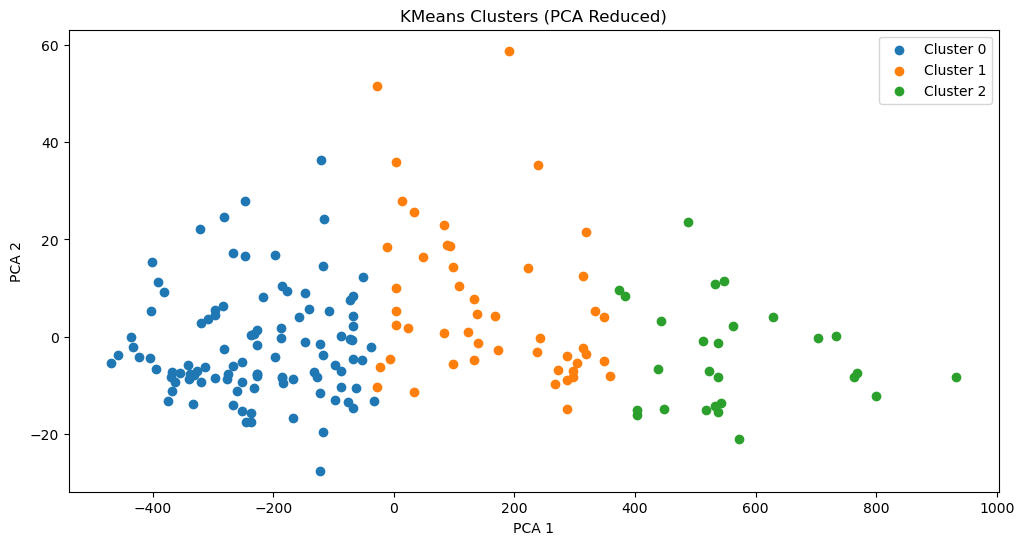

In [ ]:
plt.title("KMeans Clusters (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [ ]:
df["Clusters"] = Kmeans.labels_
print(df.groupby('Clusters').mean())

              Type    Alcohol     Malic       Ash  Alcalinity   Magnesium  \
Clusters                                                                    
0         2.352941  12.117647  1.950980  1.862745   20.401961   93.696078   
1         1.591837  12.938776  1.795918  1.979592   18.265306  109.081633   
2         1.000000  13.370370  1.111111  2.000000   16.592593  105.629630   

           Phenols  Flavanoids  Nonflavanoids  Proanthocyanins     Color  \
Clusters                                                                   
0         1.549020    1.156863            0.0         0.901961  4.166667   
1         1.918367    1.693878            0.0         1.204082  4.755102   
2         2.370370    2.592593            0.0         1.407407  5.777778   

               Hue  Dilution      Proline  
Clusters                                   
0         0.343137  1.921569   521.558824  
1         0.530612  2.326531   906.346939  
2         0.851852  2.444444  1308.777778  
